In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import numpy as np

data = pd.read_csv('train.csv',index_col='PassengerId')

In [3]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.shape

(891, 11)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [37]:
data.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [125]:
pclass = pd.get_dummies(data['Pclass'],prefix = 'Pclass')

In [126]:
data.drop(['Pclass'], axis=1, inplace=True)

In [127]:
data = data.join(pclass)

In [128]:
data

,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,,,,
1,0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0
3,1,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0
5,0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,1,0
888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,0,0
889,0,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0,0,1


In [129]:
data.drop(['Name'], axis=1, inplace=True)

In [111]:
data

,Survived,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,,,
1,0,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1
2,1,female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0
3,1,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1
4,1,female,35.0,1,0,113803,53.1000,C123,S,1,0,0
5,0,male,35.0,0,0,373450,8.0500,NaN,S,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,male,27.0,0,0,211536,13.0000,NaN,S,0,1,0
888,1,female,19.0,0,0,112053,30.0000,B42,S,1,0,0
889,0,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0,0,1


In [130]:
data['MaleFemale'] = data['Sex'].apply(lambda val: 1 if val == 'male' else 0)


In [113]:
data

,Survived,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_1,Pclass_2,Pclass_3,MaleFemale
PassengerId,,,,,,,,,,,,,
1,0,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,1
2,1,female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0,0
3,1,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,0
4,1,female,35.0,1,0,113803,53.1000,C123,S,1,0,0,0
5,0,male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,male,27.0,0,0,211536,13.0000,NaN,S,0,1,0,1
888,1,female,19.0,0,0,112053,30.0000,B42,S,1,0,0,0
889,0,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0,0,1,0


In [131]:
data.drop(['Sex'], axis=1, inplace=True)

In [132]:
data

,Survived,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_1,Pclass_2,Pclass_3,MaleFemale
PassengerId,,,,,,,,,,,,
1,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,1
2,1,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0,0
3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,0
4,1,35.0,1,0,113803,53.1000,C123,S,1,0,0,0
5,0,35.0,0,0,373450,8.0500,NaN,S,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,27.0,0,0,211536,13.0000,NaN,S,0,1,0,1
888,1,19.0,0,0,112053,30.0000,B42,S,1,0,0,0
889,0,NaN,1,2,W./C. 6607,23.4500,NaN,S,0,0,1,0


In [133]:
data.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [63]:
data.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [134]:
data.drop(['Ticket'], axis=1, inplace=True)

In [135]:
data.drop(['Cabin'], axis=1, inplace=True)

In [136]:
data

,Survived,Age,SibSp,Parch,Fare,Embarked,Pclass_1,Pclass_2,Pclass_3,MaleFemale
PassengerId,,,,,,,,,,
1,0,22.0,1,0,7.2500,S,0,0,1,1
2,1,38.0,1,0,71.2833,C,1,0,0,0
3,1,26.0,0,0,7.9250,S,0,0,1,0
4,1,35.0,1,0,53.1000,S,1,0,0,0
5,0,35.0,0,0,8.0500,S,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
887,0,27.0,0,0,13.0000,S,0,1,0,1
888,1,19.0,0,0,30.0000,S,1,0,0,0
889,0,NaN,1,2,23.4500,S,0,0,1,0


In [68]:
data.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [137]:
embarked = pd.get_dummies(data['Embarked'],prefix = 'Embarked')
embarked

,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,
1,0,0,1
2,1,0,0
3,0,0,1
4,0,0,1
5,0,0,1
...,...,...,...
887,0,0,1
888,0,0,1
889,0,0,1


In [138]:
data = data.join(embarked)

In [139]:
data

,Survived,Age,SibSp,Parch,Fare,Embarked,Pclass_1,Pclass_2,Pclass_3,MaleFemale,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,
1,0,22.0,1,0,7.2500,S,0,0,1,1,0,0,1
2,1,38.0,1,0,71.2833,C,1,0,0,0,1,0,0
3,1,26.0,0,0,7.9250,S,0,0,1,0,0,0,1
4,1,35.0,1,0,53.1000,S,1,0,0,0,0,0,1
5,0,35.0,0,0,8.0500,S,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,27.0,0,0,13.0000,S,0,1,0,1,0,0,1
888,1,19.0,0,0,30.0000,S,1,0,0,0,0,0,1
889,0,NaN,1,2,23.4500,S,0,0,1,0,0,0,1


In [140]:
data.drop(['Embarked'], axis=1, inplace=True)

In [141]:
data

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,MaleFemale,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,
1,0,22.0,1,0,7.2500,0,0,1,1,0,0,1
2,1,38.0,1,0,71.2833,1,0,0,0,1,0,0
3,1,26.0,0,0,7.9250,0,0,1,0,0,0,1
4,1,35.0,1,0,53.1000,1,0,0,0,0,0,1
5,0,35.0,0,0,8.0500,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,27.0,0,0,13.0000,0,1,0,1,0,0,1
888,1,19.0,0,0,30.0000,1,0,0,0,0,0,1
889,0,NaN,1,2,23.4500,0,0,1,0,0,0,1


In [142]:
data.isnull().sum()

Survived        0
Age           177
SibSp           0
Parch           0
Fare            0
Pclass_1        0
Pclass_2        0
Pclass_3        0
MaleFemale      0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
dtype: int64

In [144]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Age         714 non-null    float64
 2   SibSp       891 non-null    int64  
 3   Parch       891 non-null    int64  
 4   Fare        891 non-null    float64
 5   Pclass_1    891 non-null    uint8  
 6   Pclass_2    891 non-null    uint8  
 7   Pclass_3    891 non-null    uint8  
 8   MaleFemale  891 non-null    int64  
 9   Embarked_C  891 non-null    uint8  
 10  Embarked_Q  891 non-null    uint8  
 11  Embarked_S  891 non-null    uint8  
dtypes: float64(2), int64(4), uint8(6)
memory usage: 93.9 KB


In [147]:
data.Age = data.Age.round()

In [148]:
data.Age.value_counts()

24.0    32
22.0    27
28.0    27
30.0    27
18.0    26
        ..
66.0     1
53.0     1
0.0      1
12.0     1
74.0     1
Name: Age, Length: 71, dtype: int64

In [150]:
data1 = data

In [152]:
data1.fillna(data1.mean(), inplace=True)
data1.Age = data1.Age.round()

In [155]:
data1.isnull().sum()

Survived      0
Age           0
SibSp         0
Parch         0
Fare          0
Pclass_1      0
Pclass_2      0
Pclass_3      0
MaleFemale    0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

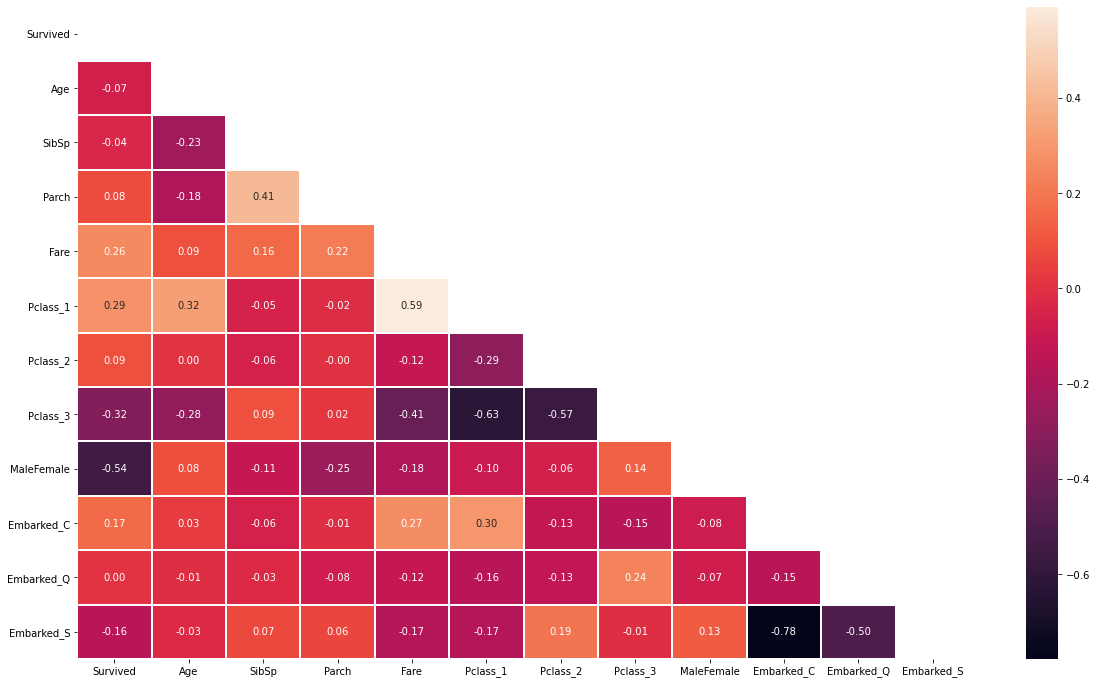

In [157]:
plt.figure(figsize = (20, 12))

corr = data1.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(corr, mask = mask, linewidths = 1, annot = True, fmt = ".2f")
plt.show()

<AxesSubplot:>

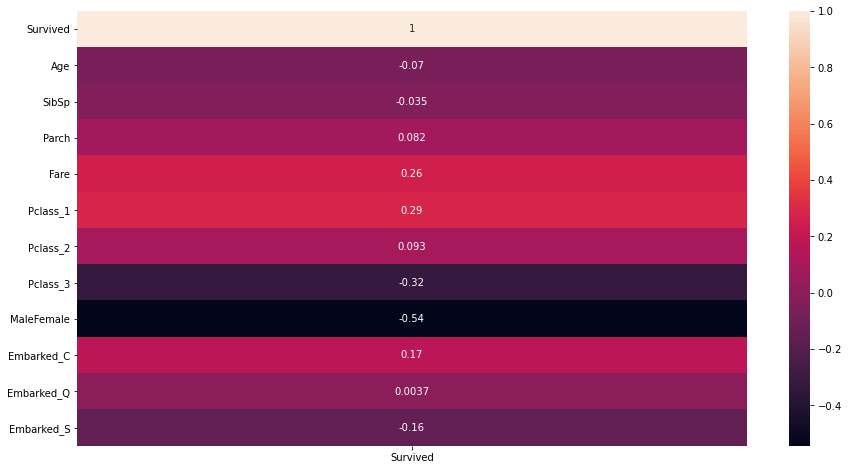

In [172]:
corr = data1.corr()
corr = corr.filter(items = ['Survived'])
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)

In [182]:
corr = data1.corr().filter(items = ['Survived'])
c1 = corr.abs().unstack()
a =c1.sort_values(ascending = False)
a.head(50)

Survived  Survived      1.000000
          MaleFemale    0.543351
          Pclass_3      0.322308
          Pclass_1      0.285904
          Fare          0.257307
          Embarked_C    0.168240
          Embarked_S    0.155660
          Pclass_2      0.093349
          Parch         0.081629
          Age           0.070324
          SibSp         0.035322
          Embarked_Q    0.003650
dtype: float64

In [183]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [187]:
import pyforest
import warnings
warnings.filterwarnings("ignore")
from sklearn import metrics
from sklearn.metrics import accuracy_score

X = data1.drop(['Survived'], axis=1)
y = data1.Survived

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

import lazypredict
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 19.57it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.82,0.80,0.80,0.82,0.12
KNeighborsClassifier,0.81,0.80,0.80,0.81,0.03
SVC,0.83,0.80,0.80,0.82,0.03
ExtraTreesClassifier,0.80,0.79,0.79,0.80,0.18
AdaBoostClassifier,0.80,0.79,0.79,0.80,0.13
LogisticRegression,0.80,0.79,0.79,0.80,0.03
NuSVC,0.81,0.79,0.79,0.81,0.04
NearestCentroid,0.78,0.78,0.78,0.78,0.02
RandomForestClassifier,0.79,0.78,0.78,0.79,0.20


In [236]:
#Logistic Regression

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter = 500000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
print(accuracy)



0.8340807174887892


In [262]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y)
model = RandomForestClassifier(n_estimators=100, max_depth=16, random_state=2)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8430493273542601

-0.13391173039589832